###bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
import heapq

###entendendo filas de prioridade e função queue

In [2]:
#priority queue = fila prioritária

fila = PriorityQueue()

#adição de itens na fila
fila.put((2, "Jéssica"))
fila.put((3, "Kamily"))
fila.put((1, "Adriel"))

In [3]:
#mostra a fila
print(fila.queue)

[(1, 'Adriel'), (3, 'Kamily'), (2, 'Jéssica')]


In [4]:
#pega o item da fila com menor valor de custo (nesse caso, Adriel) e remove ele da fila
#em casos com mais de um valor de custo (ex.: (3, 5, Andrei)), o algoritimo irá priorizar o menor
  #valor da primeira coluna, e, em caso de conflito (valores iguais), o menor valor na segunda
    #coluna será o considerado. (assim por diante)

print(fila.get())

(1, 'Adriel')


In [5]:
#verificando a lista atualizada
print(fila.queue)

[(2, 'Jéssica'), (3, 'Kamily')]


###testando o labirinto com logica de busca da melhor escolha (best first search)

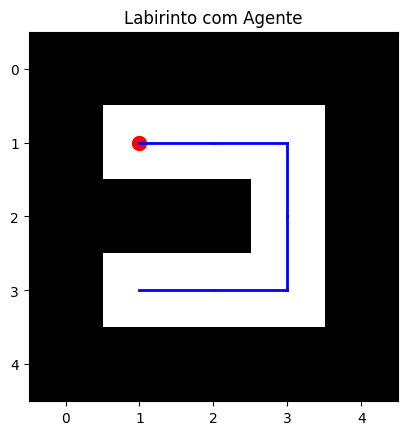

In [6]:
#collab não suporta o pyamaze, então usei o plt mesmo

def exibir_labirinto_e_agente(labirinto, agente, caminho):
    #o "gráfico" labirinto
    plt.imshow(labirinto, cmap='binary')

    #posições do agente no labirinto
    posicao_x, posicao_y = agente[0], agente[1]

    #demarcando a posição inicial do agente
    plt.scatter(posicao_x, posicao_y, color='red', s=100, marker='o')

    #vai demarcar o caminho percorrido pelo agente (em uma linha azul)
    for i in range(len(caminho) - 1):
      x1, y1 = caminho[i]
      x2, y2 = caminho[i + 1]
      plt.plot([x1, x2], [y1, y2], color='blue', linewidth=2)


    plt.title('Labirinto com Agente')
    plt.axis('on')
    plt.show()

#1 é parede e 0 é caminho livre
labirinto = [[1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 0, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1]]

agente = (1, 1)  #posição inicial do agente

caminho = [(1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (2, 1), (1, 1)]
exibir_labirinto_e_agente(labirinto, agente, caminho)


###testando o labirinto com logica de busca da melhor escolha (best first search) no algortimo Aestrela (A*)

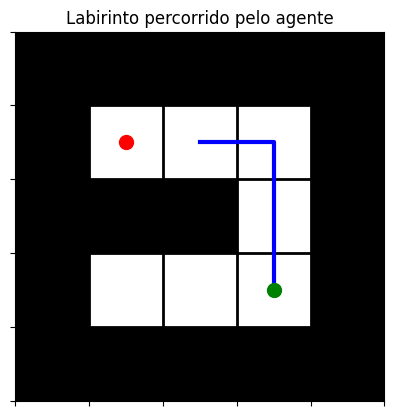

In [7]:
#função para calcular a heuristica absoluta (para forçar a não-existencia de caminhos negativos) h_score
def h_score(posicao_atual, posicao_destino):
    return abs(posicao_atual[0] - posicao_destino[0]) + abs(posicao_atual[1] - posicao_destino[1])


#função que implementa o algoritmo de busca A*
def a_star_search(labirinto, inicio, destino):

    #fila de prioridade para nós a serem explorados
    fila_prioridade = []

    #insere a posição inicial de custo 0
    heapq.heappush(fila_prioridade, (0, inicio))

    #conjunto para armazenar nós já visitados
    visitados = set()

    #dicionário para armazenar o nó pai de cada nó
    pais = {}

    #dicionário para armazenar o custo para chegar em cada nó (já garante o inicio 0)
    custos = {inicio: 0}

    #enquanto houver nós para serem explorados, faça:
    while fila_prioridade:

        #remove o nó de menor custo da fila a cada iteração
        custo_atual, posicao_atual = heapq.heappop(fila_prioridade)

        #se a posição atual é o destino, reconstrói o caminho até o momento e retorna
        if posicao_atual == destino:
            caminho = []
            while posicao_atual in pais:
                caminho.insert(0, posicao_atual)
                posicao_atual = pais[posicao_atual]
            return caminho

        #marca os nós como visitados a cada iteração
        visitados.add(posicao_atual)

        #verifica se há caminhos nos entornos (!=1)
        for movimento in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            x, y = posicao_atual[0] + movimento[0], posicao_atual[1] + movimento[1]
            nova_posicao = (x, y)

            #verifica se a nova posição atual está dentro do labirinto
              #e se é um espaço livre não visitada
            if 0 <= x < len(labirinto) and 0 <= y < len(labirinto[0]) and labirinto[x][y] == 0 and nova_posicao not in visitados:

                #calcula o custo para chegar à nova posição
                novo_custo = custos[posicao_atual] + 1
                custos[nova_posicao] = novo_custo

                #calcula a prioridade com base no custo atual,
                  #na heurística de distância (h_score) e no custo estimado (g_score) até o destino
                prioridade = novo_custo + h_score(nova_posicao, destino)

                #insere a nova posição na fila de prioridade
                heapq.heappush(fila_prioridade, (prioridade, nova_posicao))

                #armazena o nó caminho (pai da posição atual)
                pais[nova_posicao] = posicao_atual

    #se não encontrar caminhos válidos, não retorna nada
    return None


def exibir_labirinto_e_agente(labirinto, agente, destino):

    #faz o calculo direto do caminho usando o algoritmo A*
    caminho = a_star_search(labirinto, agente, destino)

    #faz a conversão do labirinto para um array
    labirinto_array = np.array(labirinto)
    n_linhas, n_colunas = labirinto_array.shape

    #define as grades para o gráfico
    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    #plota o labirinto
    plt.imshow(labirinto_array, cmap='binary')

    #plota o caminho percorrido pelo agente
    if caminho:
        caminho_array = np.array(caminho)
        plt.plot(caminho_array[:, 1], caminho_array[:, 0], color='blue', linewidth=3)

    #plota a posição inicial do agente (bola vermelha)
    plt.scatter(agente[1], agente[0], color='red', s=100, marker='o', zorder=5)

    #plota o destino (bola verde)
    plt.scatter(destino[1], destino[0], color='green', s=100, marker='o', zorder=5)

    plt.title('Labirinto percorrido pelo agente')
    plt.show()

#labirinto usado no problema
#1 é onde tem parede | 0 é onde está livre
labirinto = [[1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 0, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1]]
agente = (1, 1)
destino = (3, 3)

#exibe o labirinto com o agente e o caminho encontrado
exibir_labirinto_e_agente(labirinto, agente, destino)


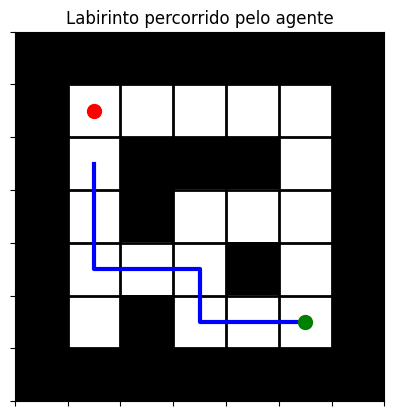

In [8]:
#novo labirinto
novo_labirinto = [[1, 1, 1, 1, 1, 1, 1],
                  [1, 0, 0, 0, 0, 0, 1],
                  [1, 0, 1, 1, 1, 0, 1],
                  [1, 0, 1, 0, 0, 0, 1],
                  [1, 0, 0, 0, 1, 0, 1],
                  [1, 0, 1, 0, 0, 0, 1],
                  [1, 1, 1, 1, 1, 1, 1]]

#nova posição de destino
novo_destino = (5, 5)

#exibe o novo labirinto com o agente anterior e o caminho encontrado
exibir_labirinto_e_agente(novo_labirinto, agente, novo_destino)
